<a href="https://colab.research.google.com/github/Deep-MI/FastSurfer/blob/master/Tutorial/Complete_FastSurfer_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to FastSurfer

## **FastSurfer - a fast and accurate deep-learning based neuroimaging pipeline**

- Fast tool for automated processing of structural human brain MRIs
- Enables time-critical clinical applications and scalable big-data analysis
- Beyond speed - Fastsurfer is accurate, reliable and sensitive ([Henschel et al., 2020](https://www.sciencedirect.com/science/article/pii/S1053811920304985))
- Freely available on Github: https://github.com/deep-mi/fastsurfer
- Requiered input: T1-weighted MRI image
- Supported formats - potentially everything nibabel can read:
> - NIFTI (.nii, .nii.gz), MGH (FreeSurfer format, .mgz), ...
- Optimal Configuration: Linux + Docker + GPU; 10 GB RAM needed

## **FastSurfer CNN** 
- Three single neural networks
> - axial, coronal, sagittal view
> - final view aggregation
- Creates a whole-brain segmentation into 95 classes (following the [Desikian-Killiany-Tourville](https://www.frontiersin.org/articles/10.3389/fnins.2012.00171/full) atlas)

# **Use case 1: Quick and Easy - FastSurfer Segmentation with three clicks**




### Enabling the GPU

First, you'll need to enable GPUs for the notebook:

- Navigate to Edit→Notebook Settings
- select GPU from the Hardware Accelerator drop-down

---

## Click 1: Upload your image



In [ ]:
#@title Click the run button to upload your T1-weighted MRI image (will be deleted after the session is over; make sure you have the permissions to do this for the image in question).
from google.colab import files
! cd "/content"
uploaded = files.upload()

img = "/content/" + list(uploaded.keys())[0]

Saving orig.mgz to orig.mgz


In [ ]:
#@title Alternative: Click the run button to download an example subject from the internet (e.g. FreeSurfer Tutorial data)
!curl -k https://surfer.nmr.mgh.harvard.edu/pub/data/tutorial_data/buckner_data/tutorial_subjs/140/mri/orig.mgz -o /content/140_orig.mgz
img = "/content/140_orig.mgz"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4664k  100 4664k    0     0  10.7M      0 --:--:-- --:--:-- --:--:-- 10.7M


---

## Click 2: Run FastSurfer

In [ ]:
#@title The first part of FastSurfer creates a whole-brain segmentation into 95 classes. Here, we use the pretrained deep-learning network FastSurferCNN using the checkpoints stored at the open source project deep-mi/fastsurfer to to run the model inference on a single image.
import os
import sys
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/deep-mi/fastsurfer.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone and install dependencies
  !git clone -q $git_repo_url
  sys.path.append(project_name)

# Go to the FastSurfer directory
%cd /content/fastsurfer/

# Run the program
! ./run_fastsurfer.sh --t1 $img \
                      --sd /content/fastsurfer_seg \
                      --sid Tutorial \
                      --seg_only --py python3

/content/fastsurfer
Setting ENV variable FASTSURFER_HOME to current working directory /content/fastsurfer. 
Change via enviroment to location of your choice if this is undesired (export FASTSURFER_HOME=/dir/to/FastSurfer)
Sun May 30 22:12:40 UTC 2021

/content/fastsurfer/FastSurferCNN /content/fastsurfer
python3 eval.py --in_name /content/140_orig.mgz --out_name /content/fastsurfer_seg/Tutorial/mri/aparc.DKTatlas+aseg.deep.mgz --order 1 --network_sagittal_path /content/fastsurfer/checkpoints/Sagittal_Weights_FastSurferCNN/ckpts/Epoch_30_training_state.pkl --network_axial_path /content/fastsurfer/checkpoints/Axial_Weights_FastSurferCNN/ckpts/Epoch_30_training_state.pkl --network_coronal_path /content/fastsurfer/checkpoints/Coronal_Weights_FastSurferCNN/ckpts/Epoch_30_training_state.pkl --batch_size 8 --simple_run --run_viewagg_on check
Reading volume /content/140_orig.mgz
Cuda available: True, # Available GPUS: 1, Cuda user disabled (--no_cuda flag): False, --> Using device: cuda
tcmall

---

## Click 3: Download the image



In [ ]:
#@title Click the run button to download the segmentation to a destination of your choice
from google.colab import files
files.download('/content/fastsurfer_seg/Tutorial/mri/aparc.DKTatlas+aseg.deep.mgz')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@title Click this run button, if you would prefer to download the segmentation in nifti-format
import nibabel as nib
# conversion to nifti
data = nib.load('/content/fastsurfer_seg/Tutorial/mri/aparc.DKTatlas+aseg.deep.mgz')
img_nifti = nib.Nifti1Image(data.get_fdata(), data.affine, header=nib.Nifti1Header())
nib.nifti1.save(img_nifti, '/content/fastsurfer_seg/Tutorial/mri/aparc.DKTatlas+aseg.deep.nii.gz')

from google.colab import files
files.download('/content/fastsurfer_seg/Tutorial/mri/aparc.DKTatlas+aseg.deep.nii.gz')


In [ ]:
#@title If you chose the example subject (Alternative in Click 1), click the run button if you want to download the input image as well
from google.colab import files
files.download("/content/140_orig.mgz")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@title Click this run button, if you would prefer to download the image in nifti-format
import nibabel as nib
# conversion to nifti
data = nib.load("/content/140_orig.mgz")
img_nifti = nib.Nifti1Image(data.get_fdata(), data.affine, header=nib.Nifti1Header())
nib.nifti1.save(img_nifti, "/content/140_orig.nii.gz")

from google.colab import files
files.download("/content/140_orig.nii.gz")


---

## Done! 

Congratulations. You succesfully segmented your image into 95 classes :). Now Let us have a look at the output. 

### Inspect the results

You can use the neuroimaging viewer of your choice. As an example, in Freeview you could visualize the segmentations and input image like this:

```bash
# If you have not done this yet: export and source FreeSurfer
export FREESURFER_HOME=/path/to/your/FreeSurfer_install
source $FREESURFER_HOME/SetUpFreeSurfer.sh

# Define your input image (the one you uploaded above)
input=/FastSurfer/Tutorial/data/140_orig.mgz

# Define where you stored the output
output=/FastSurfer/Tutorial/output/aparc.DKTatlas+aseg.deep.mgz

# Freeview command
freeview -v $input \
         -v $output:colormap=lut
```

Or plot some slices and 3D measures here:

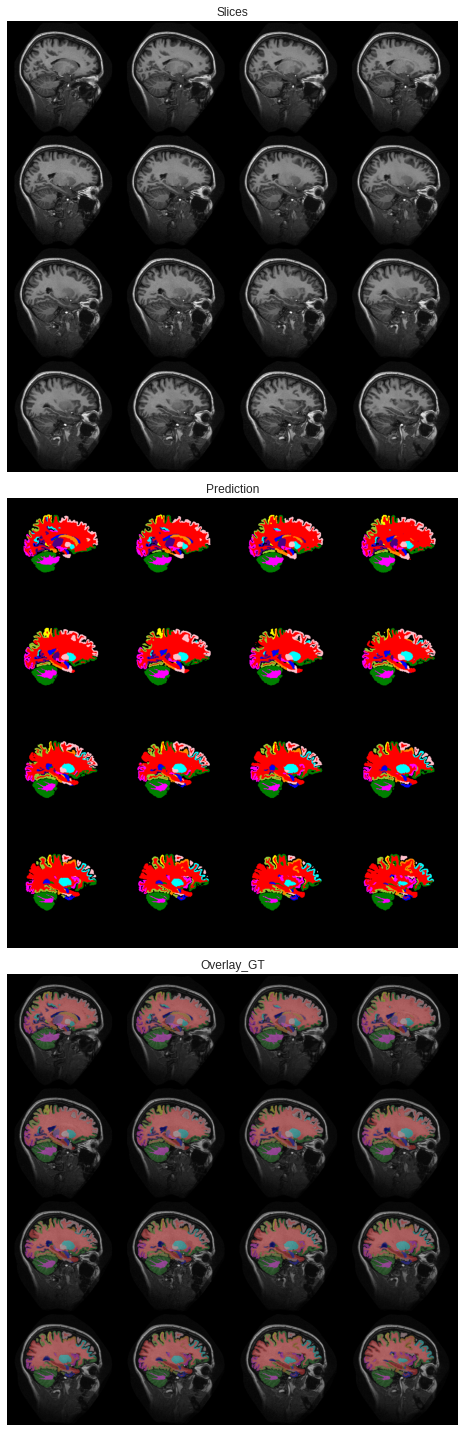

In [ ]:
#@title Plot some slices from the segmented brain
%matplotlib inline
import nibabel as nib
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from skimage import color
import torch
import numpy as np
from torchvision import utils

def plot_predictions(image, pred):
    """
    Function to plot predictions from validation set.
    :param images_batch:
    :param labels_batch:
    :param batch_output:
    :param plt_title:
    :param file_save_name:
    :return:
    """

    f = plt.figure(figsize=(20, 20))
    n, h, w = image.shape

    mid_slice = n // 2
    image = torch.from_numpy(np.expand_dims(image[mid_slice+16:mid_slice+32, :, :], 1))
    grid = utils.make_grid(image, nrow=4)

    plt.subplot(311)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))
    plt.title('Slices')

    grid2 = utils.make_grid(torch.from_numpy(np.expand_dims(pred[mid_slice+16:mid_slice+32, ...], 1)), nrow=4)[0]
    color_grid = color.label2rgb(grid2.numpy(), bg_label=0)
    plt.subplot(312)
    plt.imshow(color_grid)
    plt.title('Prediction')

    plt.subplot(313)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))
    plt.imshow(color_grid, alpha=0.3)
    plt.title('Overlay_GT')

    for ax in f.axes:
      ax.grid(b=None)
      ax.axis("off")
    plt.tight_layout()

    plt.show()

orig_data = nib.load(img).get_fdata() / 255
pred_data = nib.load('/content/fastsurfer_seg/Tutorial/mri/aparc.DKTatlas+aseg.deep.mgz').get_fdata()
plot_predictions(orig_data, pred_data)

In [ ]:
#@title Select and visualize your structures of interest in 3D by using the dropdown menu and clicking "Run Interact". 
from ipywidgets import widgets
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
#from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure

pred_data = nib.load('/content/fastsurfer_seg/Tutorial/mri/aparc.DKTatlas+aseg.deep.mgz').get_fdata()

labels = [
'Lateral-Ventricle',
'Inf-Lat-Vent',
'Cerebellum-White-Matter',
'Cerebellum-Cortex',
'Thalamus-Proper',
'Caudate',
'Putamen',
'Pallidum',
'3rd-Ventricle',
'4th-Ventricle',
'Brain-Stem',
'Hippocampus',
'Amygdala',
'CSF',
'Accumbens-area',
'VentralDC',
'choroid-plexus',
'caudalanteriorcingulate',
'caudalmiddlefrontal',
'cuneus',
'entorhinal',
'fusiform',
'inferiorparietal',
'inferiortemporal',
'isthmuscingulate',
'lateraloccipital',
'lateralorbitofrontal',
'lingual',
'medialorbitofrontal',
'middletemporal',
'parahippocampal',
'paracentral',
'parsopercularis',
'parsorbitalis',
'parstriangularis',
'pericalcarine',
'postcentral',
'posteriorcingulate',
'precentral',
'precuneus',
'rostralanteriorcingulate',
'rostralmiddlefrontal',
'superiorfrontal',
'superiorparietal',
'superiortemporal',
'supramarginal',
'transversetemporal',
'insula']

labels_lookup = {
'Left-Lateral-Ventricle': 4,
'Left-Inf-Lat-Vent': 5,
'Left-Cerebellum-White-Matter': 7,
'Left-Cerebellum-Cortex': 8,
'Left-Thalamus-Proper': 10,
'Left-Caudate': 11,
'Left-Putamen': 12,
'Left-Pallidum': 13,
'Left-3rd-Ventricle': 14,
'Left-4th-Ventricle': 15,
'Left-Brain-Stem': 16,
'Left-Hippocampus': 17,
'Left-Amygdala': 18,
'Left-CSF': 24,
'Left-Accumbens-area': 26,
'Left-VentralDC': 28,
'Left-choroid-plexus': 31,
'Right-Lateral-Ventricle': 43,
'Right-Inf-Lat-Vent': 44,
'Right-Cerebellum-White-Matter': 46,
'Right-Cerebellum-Cortex': 47,
'Right-Thalamus-Proper': 49,
'Right-Caudate': 50,
'Right-Putamen': 51,
'Right-Pallidum': 52,
'Right-Hippocampus': 53,
'Right-Amygdala': 54,
'Right-Accumbens-area': 58,
'Right-VentralDC': 60,
'Right-choroid-plexus': 63,
'Right-3rd-Ventricle': 14,
'Right-4th-Ventricle': 15,
'Right-Brain-Stem': 16,
'Right-CSF': 24,
'ctx-lh-caudalanteriorcingulate': 1002,
'ctx-lh-caudalmiddlefrontal': 1003,
'ctx-lh-cuneus': 1005,
'ctx-lh-entorhinal': 1006,
'ctx-lh-fusiform': 1007,
'ctx-lh-inferiorparietal': 1008,
'ctx-lh-inferiortemporal': 1009,
'ctx-lh-isthmuscingulate': 1010,
'ctx-lh-lateraloccipital': 1011,
'ctx-lh-lateralorbitofrontal': 1012,
'ctx-lh-lingual': 1013,
'ctx-lh-medialorbitofrontal': 1014,
'ctx-lh-middletemporal': 1015,
'ctx-lh-parahippocampal': 1016,
'ctx-lh-paracentral': 1017,
'ctx-lh-parsopercularis': 1018,
'ctx-lh-parsorbitalis': 1019,
'ctx-lh-parstriangularis': 1020,
'ctx-lh-pericalcarine': 1021,
'ctx-lh-postcentral': 1022,
'ctx-lh-posteriorcingulate': 1023,
'ctx-lh-precentral': 1024,
'ctx-lh-precuneus': 1025,
'ctx-lh-rostralanteriorcingulate': 1026,
'ctx-lh-rostralmiddlefrontal': 1027,
'ctx-lh-superiorfrontal': 1028,
'ctx-lh-superiorparietal': 1029,
'ctx-lh-superiortemporal': 1030,
'ctx-lh-supramarginal': 1031,
'ctx-lh-transversetemporal': 1034,
'ctx-lh-insula': 1035,
'ctx-rh-caudalanteriorcingulate': 2002,
'ctx-rh-caudalmiddlefrontal': 2003,
'ctx-rh-cuneus': 2005,
'ctx-rh-entorhinal': 2006,
'ctx-rh-fusiform': 2007,
'ctx-rh-inferiorparietal': 2008,
'ctx-rh-inferiortemporal': 2009,
'ctx-rh-isthmuscingulate': 2010,
'ctx-rh-lateraloccipital': 2011,
'ctx-rh-lateralorbitofrontal': 2012,
'ctx-rh-lingual': 2013,
'ctx-rh-medialorbitofrontal': 2014,
'ctx-rh-middletemporal': 2015,
'ctx-rh-parahippocampal': 2016,
'ctx-rh-paracentral': 2017,
'ctx-rh-parsopercularis': 2018,
'ctx-rh-parsorbitalis': 2019,
'ctx-rh-parstriangularis': 2020,
'ctx-rh-pericalcarine': 2021,
'ctx-rh-postcentral': 2022,
'ctx-rh-posteriorcingulate': 2023,
'ctx-rh-precentral': 2024,
'ctx-rh-precuneus': 2025,
'ctx-rh-rostralanteriorcingulate': 2026,
'ctx-rh-rostralmiddlefrontal': 2027,
'ctx-rh-superiorfrontal': 2028,
'ctx-rh-superiorparietal': 2029,
'ctx-rh-superiortemporal': 2030,
'ctx-rh-supramarginal': 2031,
'ctx-rh-transversetemporal': 2034,
'ctx-rh-insula': 2035}

def label_lookups(structure, hemi):
  # determine what to plot
  if structure[0].isupper():
    if hemi == "left":
      label = labels_lookup["Left-" + structure]
    elif hemi == "right":
      label = labels_lookup["Right-" + structure]
    else:
      label = [labels_lookup["Left-" + structure], labels_lookup["Right-" + structure]]
  else:
    if hemi == "left":
      label = labels_lookup["ctx-lh-" + structure]
    elif hemi == "right":
      label = labels_lookup["ctx-rh-" + structure]
    else:
      label = [labels_lookup["ctx-lh-" + structure], labels_lookup["ctx-rh-" + structure]]
  return label

@widgets.interact_manual(
    hemisphere=['left', 'right', 'both'], structure=labels)
def plot_3d_plotly_shape(structure, hemisphere, show_mesh=True, crop=True, grid=True):
  import plotly.graph_objects as go
  label = label_lookups(structure, hemisphere)
  test_cond = np.in1d(pred_data, label).reshape(pred_data.shape)
  roi = np.where(test_cond, 1, 0)
  vert_p, faces_p, normals_p, values_p = measure.marching_cubes_lewiner(roi, 0, spacing=(1, 1, 1))

  fig = go.Figure(data=[go.Mesh3d(
        x=vert_p[:, 0],
        y=vert_p[:, 1],
        z=vert_p[:, 2],
        # i, j and k give the vertices of triangles
        # here we represent the 4 triangles of the tetrahedron surface
        i=faces_p[:, 0],
        j=faces_p[:, 1],
        k=faces_p[:, 2],
        name='y',
        showscale=True
    )]
  )

  if show_mesh:
    #plot surface triangulation
    tri_vertices = vert_p[faces_p]
    Xe = []
    Ye = []
    Ze = []
    
    for T in tri_vertices:
      Xe += [T[k%3][0] for k in range(4)] + [ None]
      Ye += [T[k%3][1] for k in range(4)] + [ None]
      Ze += [T[k%3][2] for k in range(4)] + [ None]
       
    fig.add_trace(go.Scatter3d(x=Xe,
                     y=Ye,
                     z=Ze,
                     mode='lines',
                     name='',
                     line=dict(color= 'rgb(40,40,40)', width=0.5)))
  if crop:
    scale_min = np.min(vert_p, axis=0)
    scale_max = np.max(vert_p, axis=0)
  else:
    scale_min = [0, 0, 0]
    scale_max = pred_data.shape
  fig.update_layout(
    scene = dict(aspectratio=dict(x=1, y=1, z=1),
        xaxis = dict(range=[scale_min[0], scale_max[0]], visible=grid),
        yaxis = dict(range=[scale_min[1], scale_max[1]], visible=grid),
        zaxis = dict(range=[scale_min[2], scale_max[2]], visible=grid),) 
    )

  fig.show()



interactive(children=(Dropdown(description='structure', options=('Lateral-Ventricle', 'Inf-Lat-Vent', 'Cerebel…

If the widget is disabled (you are not able to select anything), simply press the play button next to the header.

You can use your mouse to zoom in and out as well as rotate the generated mesh to get a better look at the segmentation. 

To display the surface mesh (edges), check the box "show_mesh" (done by default). A plotting grid can be enabled by checking the box "grid". Checking the box "crop" will automatically adjust the field of view to the range of the ROI. Unchecking it scales the presentation to the dimension of the original scan.


# **Use case 2: Quick and a bit more advanced - Segmentation with FastSurfer on your local machine**

If you are working with data that can not be uploaded to the cloud, have a larger number of samples or want to leverage the power of a compute cluster etc., you need a local installation of FastSurfer. 

To run the segmentation part, this is still fairly easy. You just need three things:
1. an input image
2. an output directory
3. docker or a local clone of the FastSurfer repository as well as the necessary dependencies (=the advanced part)

### A. Define input image and output directory

Let's say we are using the same image and output directory from Use case 1. You can download the image with the command (make sure the download directory exists):

```bash
curl -k https://surfer.nmr.mgh.harvard.edu/pub/data/tutorial_data/buckner_data/tutorial_subjs/140/mri/orig.mgz -o ./FastSurfer/Tutorial/data/140_orig.mgz
```

For me, this is file will be stored as 140_orig.mgz in the directory 
```bash
FastSurfer
|
-Tutorial
    |
    -data 
      |
      -140_orig.mgz
```
and I want my output stored in 
```bash
FastSurfer
|
-Tutorial
    |
    -output
       |
       -...my file will later be stored here....
```
I store these path in variables called *input* and *outputDir* and will later refer to them by the \$-symbol (\$input, \$outputDir). This assignment basically works like in any math calculation (e.g. 5+3 equals 8; a=5, b=3 --> a+b equals 8, or in the shell \$a+\$b equals 8).

```bash
# Define your input image (the one you uploaded above)
input=/FastSurfer/Tutorial/data/140_orig.mgz
 
# Define where you stored the output
outputDir=/FastSurfer/Tutorial/output
```

Now, the only thing left to do for me is to clone the repository and install all necessary dependencies. 

### B. FastSurfer Installation 


### Requirements
- Linux OS (GPU or CPU), Mac OS (Docker + CPU only), Google Colab (cloud computing)
- ~ 10 GB RAM
- Can use Docker or local install (conda or python3 + pip)
- Optimal: Linux OS + GPU + Docker

In [ ]:
#@title ### Select an installation option
import ipywidgets as widgets
from IPython.display import display

class ClickResponsiveToggleButtons(widgets.ToggleButtons):

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self._click_handlers = widgets.CallbackDispatcher()
        self.on_msg(self._handle_button_msg)
        pass

    def on_click(self, callback, remove=False):
        """Register a callback to execute when the button is clicked.

        The callback will be called with one argument, the clicked button
        widget instance.

        Parameters
        ----------
        remove: bool (optional)
            Set to true to remove the callback from the list of callbacks.
        """
        self._click_handlers.register_callback(callback, remove=remove)

    def _handle_button_msg(self, _, content, buffers):
        """Handle a msg from the front-end.

        Parameters
        ----------
        content: dict
            Content of the msg.
        """
        if content.get('event', '') == 'click':
            self._click_handlers(self)
            
toggle = ClickResponsiveToggleButtons(
    options=['python3 + pip (GPU)', 'conda (GPU)', 'docker (GPU)', 'python3 + pip (CPU)', 'conda (CPU)', 'docker (CPU)'],
    description='Option:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['FastSurfer installation with python3 + pip on GPU', 
              'FastSurfer installation with conda on GPU', 
              'FastSurfer installation with docker on GPU',
              'FastSurfer installation with python3 + pip on CPU', 
              'FastSurfer installation with conda on CPU', 
              'FastSurfer installation with docker on CPU'],
#     icons=['check'] * 3
)

html3 = widgets.HTML(value="Select and installation option",
    placeholder='Command',
    description='Command:',
)

def send_message(sender):
    install = {"python3 + pip (GPU)": '<p style="font-size:1em;line-height:1.5;background-color:#EEEEEE">\
                                 <font face="Courier New"># Clone FastSurfer repo <br>\
                                 git clone -q https://github.com/deep-mi/fastsurfer.git <br>\
                                 cd fastsurfer <br>\
                                 export FASTSURFER_HOME=$PWD <br><br>\
                                 # Install python dependencies <br>\
                                 python3 -m pip install --user --trusted-host pypi.python.org \
                                 --prefer-binary -r requirements.txt</font></p>', 
               "conda (GPU)": '<p style="font-size:1em;line-height:1.5;background-color:#EEEEEE">\
                        <font face="Courier New"># Clone FastSurfer repo<br>\
                        git clone -q https://github.com/deep-mi/fastsurfer.git <br>\
                        cd fastsurfer <br>\
                        export FASTSURFER_HOME=$PWD <br><br>\
                        # Install python dependencies<br>\
                        conda env create --name fastsurfer_gpu --file ./fastsurfer_env_gpu.yml <br>\
                        conda activate fastsurfer_gpu</font></p>', 
               "docker (GPU)": '<p style="font-size:1em;background-color:#EEEEEE""><font face="Courier New">\
                          # pull docker image <br>\
                          docker image pull deepmi/fastsurfer:gpu-beta</font></p>',
              "python3 + pip (CPU)": '<p style="font-size:1em;line-height:1.5;background-color:#EEEEEE">\
                                 <font face="Courier New"># Clone FastSurfer repo <br>\
                                 git clone -q https://github.com/deep-mi/fastsurfer.git <br>\
                                 cd fastsurfer <br>\
                                 export FASTSURFER_HOME=$PWD <br><br>\
                                 # Open requirements (with any text editor) and add +cpu to lines 24 and 26 <br>\
                                 # Install python dependencies <br>\
                                 python3 -m pip install --user --trusted-host pypi.python.org \
                                 --prefer-binary -r requirements.txt</font></p>', 
               "conda (CPU)": '<p style="font-size:1em;line-height:1.5;background-color:#EEEEEE">\
                        <font face="Courier New"># Clone FastSurfer repo<br>\
                        git clone -q https://github.com/deep-mi/fastsurfer.git <br>\
                        cd fastsurfer <br>\
                        export FASTSURFER_HOME=$PWD <br><br>\
                        # Install python dependencies<br>\
                        conda env create --name fastsurfer_cpu --file ./fastsurfer_env_cpu.yml <br>\
                        conda activate fastsurfer_cpu</font></p>', 
               "docker (CPU)": '<p style="font-size:1em;background-color:#EEEEEE""><font face="Courier New">\
                          # pull docker image <br>\
                          docker image pull deepmi/fastsurfer:cpu-beta</font></p>'}
    html3.value= install[sender.value]
    
toggle.on_click(send_message)

display(toggle)
display(html3)

ClickResponsiveToggleButtons(description='Option:', options=('python3 + pip (GPU)', 'conda (GPU)', 'docker (GP…

HTML(value='Select and installation option', description='Command:', placeholder='Command')

### List of installation options, in case the widget is not working

#### python3 + pip



##### GPU
```bash
# Clone FastSurfer repo
git clone -q https://github.com/deep-mi/fastsurfer.git
cd fastsurfer
export FASTSURFER_HOME=$PWD

# Install python dependencies
python3 -m pip install --user --trusted-host pypi.python.org --prefer-binary -r requirements.txt
```

##### CPU

```bash
# Clone FastSurfer repo
git clone -q https://github.com/deep-mi/fastsurfer.git
cd fastsurfer
export FASTSURFER_HOME=$PWD

# Open requirements (with any text editor) and add +cpu to lines 24 and 26
# Install python dependencies
python3 -m pip install --user --trusted-host pypi.python.org --prefer-binary -r requirements.txt
```


#### conda


##### GPU
```bash
# Clone FastSurfer repo
git clone -q https://github.com/deep-mi/fastsurfer.git
cd fastsurfer
export FASTSURFER_HOME=$PWD

# Install python dependencies
conda env create --name fastsurfer_gpu --file ./fastsurfer_env_gpu.yml
conda activate fastsurfer_gpu
```

##### CPU

```bash
# Clone FastSurfer repo
git clone -q https://github.com/deep-mi/fastsurfer.git
cd fastsurfer
export FASTSURFER_HOME=$PWD

# Install python dependencies
conda env create --name fastsurfer_cpu --file ./fastsurfer_env_cpu.yml
conda activate fastsurfer_cpu
```

#### docker

##### GPU
```bash
# pull docker image
docker image pull deepmi/fastsurfer:gpu-beta
```

##### CPU

```bash
# pull docker image
docker image pull deepmi/fastsurfer:cpu-beta
```

#### Short explanation of the commands

For python3 + pip and conda, we first create a local copy of the FastSurfer code:
- [git clone](https://git-scm.com/docs/git-clone): download your own copy of the FastSurfer repository
- [cd](https://wiki.ubuntuusers.de/cd/) fastsurfer: go into the directory you just created with the git command (cd = change directory)
- export FASTSURFER_HOME=$PWD: create a variable pointing to your FastSurfer installation so you can run the commands from anywhere on your computer. PWD stands for "Print Working Directory" and refers to the directory you are in at the time of issuing the command (e.g. here the fastsurfer directory in which we went with the previous command)

For python3 you then install all dependencies (listed in requirements.txt). It is best to do this in an virtual environment (like e.g. [pipenv](https://pypi.org/project/pipenv/)/[virtualenv](https://pypi.org/project/virtualenv/)).

For [conda](https://conda.io/projects/conda/en/latest/user-guide/getting-started.html) you are creating a [conda environment](https://conda.io/projects/conda/en/latest/user-guide/getting-started.html#managing-environments) containing all the dependencies (fastsurfer_gpu or fastsurfer_cpu). You need to activate this environment with conda activate. To deactivate it, simply type conda deactivate. You have to activate the environment every time you want to run FastSurfer code.

For [docker](https://docs.docker.com/), you are simply downloading the fastsurfer image (deepmi/fastsurfer:gpu-beta). Alternatively, you could also download deepmi/fastsurfer:segonly-gpu-beta, deepmi/fastsurfer:segonly-cpu-beta, deepmi/fastsurfer:cpu-beta or deepmi/fastsurfer:surfonly-cpu-beta. The first part of the name indicates what you are running (fastsurfer from the deepmi website). The tag is split into to parts. The first defines what part of the pipeline you can run with it (segonly=only segmentation, surfonly=only surface pipeline, no prefix=both options can be run) and the second defines on what you run it (cpu or gpu). If you want to modify the image, you can find the Dockerfiles the images are based on in our github page (in the [Docker folder](https://github.com/Deep-MI/FastSurfer/blob/master/Docker/)). The [README](https://github.com/Deep-MI/FastSurfer/blob/master/Docker/README.md) there also contains information on how to build the docker from source.

### C. Define the run command

#### C1 - Local install run command (conda or pip)

We are using our variables from above:
- Section A: \$input (/FastSurfer/Tutorial/data/140_orig.mgz) and \$outputDir (/FastSurfer/Tutorial/output)
- Section B: \$FASTSURFER_HOME variable pointing to your local installation of FastSurfer (included in the installation command; run it again with export FASTSURFER_HOME=/path/to/fastsurfer)
- New: Add the Subject Identifier (name of the folder in which your results will finally be stored. Normally these are defined with respect to the image, so in this case we are using 140)

```bash
###
# This was already done in Section A and B, but posted here for consistency
### 
# Define your input image (the one you downloaded above)
input=/FastSurfer/Tutorial/data/140_orig.mgz
 
# Define where you stored the output
outputDir=/FastSurfer/Tutorial/output

# Define where your local installation of FastSurfer can be found
export FASTSURFER_HOME=./fastsurfer
####

###
# Final run command
###
$FASTSURFER_HOME/run_fastsurfer.sh --t1 $input \
                                   --sd $outputDir \
                                   --sid 140 \
                                   --seg_only
```

#### C2 - Docker run command

For a docker version, the procedure is basically the same as for the local install in C1. We are using our variables from above with a slight change:
- Section A - \$output stays as it is (*Fastsurfer/Tutorial/output*)
- Section A - \$input (*FastSurfer/Tutorial/data/140_orig.mgz*) is split into two parts
> - the directory *FastSurfer/Tutorial/data/*
> - the file name *140_orig.mgz*
- New - Add the Subject Identifier (name of the folder in which your results will finally be stored). Normally these are defined with respect to the image, so in this case we are using *140*
- New - docker specific definitions
> - *docker run [options] image:tag* --> run your docker image
> - *--gpus device=0* --> use one gpu
> - *--rm* --> remove the container once the process finishes
> - *--user \$(id -u):\$(id -g)* --> run docker as local user

Why do we split the \$input into two parts?
- Docker does only have access to the folders you specify via the -v flag (stands for volume mount); so in order to see the image, you have to tell it in which directory it should look. Inside docker this directory is known by the name behind the colon (-v path/to/input_dir:/name_inside_docker)

```bash
###
# Final run command
###
docker run --gpus device=0 --rm --user $(id -u):$(id -g) \
          -v /FastSurfer/Tutorial/data:/data \
          -v /FastSurfer/Tutorial/output:/output \
          deepmi/fastsurfer:gpu-beta --t1 /data/140_orig.mgz \
                         --sd /output \
                         --sid 140 \
                         --seg_only
```

The docker is constructed such that it automatically enters the _run_fastsurfer.sh_ command. Therefore, the flags are identical to the command under C1.

### Done!


Congratulations. You succesfully installed FastSurfer and segmented your image into 95 classes on your local GPU. 

#### Inspect the results

As before, you can now have a look at the output. 

The run_fastsurfer command automatically generates the following folder structures and files:

```
Tutorial
└──output
    └──140
        ├── mri
        │   └──aparc.DKTatlas+aseg.deep.mgz
        └──scripts
            └──deep_seg.log

```

So as you can see, the Subject Folder you defined by --sid, contains two subdirectories - mri and scripts. In mri you can find the final segmentation under the name aparc.DKTatlas+aseg.deep.mgz. In the scripts folder you can find the log-file for the run. 

As before, you can now use the neuroimaging viewer of your choice to inspect the results. As an example, in Freeview you could visualize the segmentations and input image like this:

```bash
# If you have not done this yet: export and source FreeSurfer
export FREESURFER_HOME=/path/to/your/FreeSurfer_install
source $FREESURFER_HOME/SetUpFreeSurfer.sh

# Define your input image (the one you downloaded above)
input=/FastSurfer/Tutorial/data/140_orig.mgz

# Define where you stored the output
output=/FastSurfer/Tutorial/output/TestSubject1/mri/aparc.DKTatlas+aseg.deep.mgz

# Freeview command
freeview -v $input \
         -v $output:colormap=lut
```

... finally, we can run the **recon-surf** pipeline on top of the segmentation (or FastSurfer as a whole), to generate surface models, roi statistics, thickness, curvature maps and everything else you find in a normal FreeSurfer run!

### FAQ - Common questions and problems

#### 1. I get "*RuntimeError: CUDA out of memory*" when running the segmentation

- Potential solution: adjust the batch size. By default this is set to 8. You can change this argument by adding the flag --batch followed by a number to the run command, e.g. to change it to 4 in the command under C1: 
```
$FASTSURFER_HOME/run_fastsurfer.sh --t1 $input \
                                   --sd $outputDir \
                                   --sid 140 \
                                   --seg_only \
                                   --batch 4
```
in the command under C2:
```
docker run --gpus device=0 --rm --user $(id -u):$(id -g) \
          -v /FastSurfer/Tutorial/data:/data \
          -v /FastSurfer/Tutorial/output:/output \
          fastsurfer:gpu --t1 /data/140_orig.mgz \
                         --sd /output \
                         --sid 140 \
                         --seg_only \
                         --batch 4
```



#### 2. I am running the cpu version on Mac with docker and it just stops without any error

- Potential solution: This is probably a memory problem. In order to run FastSurfer you need around 10 GB RAM, but Docker Desktop on MAC is set to use 2 GB runtime memory by default. You can overwrite the settings under Docker Desktop --> Preferences --> Resources --> Advanced, slide the bar under Memory to 10 GB; see: https://docs.docker.com/docker-for-mac/ for details.

# **Use case 3 - Surface models, Thickness maps and more: FastSurfer's recon-surf command** 

With recon-surf, we provide a full FreeSurfer alternative for cortical surface reconstruction, mapping of cortical labels and traditional point-wise and ROI thickness analysis in approximately 45 minutes (+ optionally 30 min for group registration; CPU with 4 Threads and run in parallel).

To run the surface pipeline _recon-surf_, you need the same three things as for the segmentation part:
1. an input image
2. an output directory
3. docker or a local clone of the FastSurfer repository as well as the necessary dependencies


## A. Define input image and output directory

As before, we are using the same image and output directory. For me, this is 140_orig.mgz in the directory 
```bash
FastSurfer
|
-Tutorial
    |
    -data 
      |
      -140_orig.mgz
```
and I am storing my output in 
```bash
FastSurfer
|
-Tutorial
    |
    -output
       |
       ...my files will later be stored here....
```

```bash
# Define your input image 
input=/FastSurfer/Tutorial/data/140_orig.mgz
 
# Define where you stored the output
outputDir=/FastSurfer/Tutorial/output
```

## B1. FastSurfer Installation 


### Requirements
- Linux OS (GPU or CPU), Mac OS (Docker + CPU only), Google Colab (cloud computing)
- ~ 10 GB RAM
- Can use Docker or local install (conda or python3 + pip)
- Optimal: Linux OS + GPU + Docker

In [ ]:
#@title ### Select an installation option
import ipywidgets as widgets
from IPython.display import display

class ClickResponsiveToggleButtons(widgets.ToggleButtons):

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self._click_handlers = widgets.CallbackDispatcher()
        self.on_msg(self._handle_button_msg)
        pass

    def on_click(self, callback, remove=False):
        """Register a callback to execute when the button is clicked.

        The callback will be called with one argument, the clicked button
        widget instance.

        Parameters
        ----------
        remove: bool (optional)
            Set to true to remove the callback from the list of callbacks.
        """
        self._click_handlers.register_callback(callback, remove=remove)

    def _handle_button_msg(self, _, content, buffers):
        """Handle a msg from the front-end.

        Parameters
        ----------
        content: dict
            Content of the msg.
        """
        if content.get('event', '') == 'click':
            self._click_handlers(self)
            
toggle = ClickResponsiveToggleButtons(
    options=['python3 + pip (GPU)', 'conda (GPU)', 'docker (GPU)', 'python3 + pip (CPU)', 'conda (CPU)', 'docker (CPU)'],
    description='Option:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['FastSurfer installation with python3 + pip on GPU', 
              'FastSurfer installation with conda on GPU', 
              'FastSurfer installation with docker on GPU',
              'FastSurfer installation with python3 + pip on CPU', 
              'FastSurfer installation with conda on CPU', 
              'FastSurfer installation with docker on CPU'],
#     icons=['check'] * 3
)

html3 = widgets.HTML(value="Select and installation option",
    placeholder='Command',
    description='Command:',
)

def send_message(sender):
    install = {"python3 + pip (GPU)": '<p style="font-size:1em;line-height:1.5;background-color:#EEEEEE">\
                                 <font face="Courier New"># Clone FastSurfer repo <br>\
                                 git clone -q https://github.com/deep-mi/fastsurfer.git <br>\
                                 cd fastsurfer <br>\
                                 export FASTSURFER_HOME=$PWD <br><br>\
                                 # Install python dependencies <br>\
                                 python3 -m pip install --user --trusted-host pypi.python.org \
                                 --prefer-binary -r requirements.txt</font></p>', 
               "conda (GPU)": '<p style="font-size:1em;line-height:1.5;background-color:#EEEEEE">\
                        <font face="Courier New"># Clone FastSurfer repo<br>\
                        git clone -q https://github.com/deep-mi/fastsurfer.git <br>\
                        cd fastsurfer <br>\
                        export FASTSURFER_HOME=$PWD <br><br>\
                        # Install python dependencies<br>\
                        conda env create --name fastsurfer_gpu --file ./fastsurfer_env_gpu.yml <br>\
                        conda activate fastsurfer_gpu</font></p>', 
               "docker (GPU)": '<p style="font-size:1em;background-color:#EEEEEE""><font face="Courier New">\
                          # pull docker image <br>\
                          docker image pull deepmi/fastsurfer:gpu</font></p>',
              "python3 + pip (CPU)": '<p style="font-size:1em;line-height:1.5;background-color:#EEEEEE">\
                                 <font face="Courier New"># Clone FastSurfer repo <br>\
                                 git clone -q https://github.com/deep-mi/fastsurfer.git <br>\
                                 cd fastsurfer <br>\
                                 export FASTSURFER_HOME=$PWD <br><br>\
                                 # Open requirements (with any text editor) and add +cpu to lines 24 and 26 <br>\
                                 # Install python dependencies <br>\
                                 python3 -m pip install --user --trusted-host pypi.python.org \
                                 --prefer-binary -r requirements.txt</font></p>', 
               "conda (CPU)": '<p style="font-size:1em;line-height:1.5;background-color:#EEEEEE">\
                        <font face="Courier New"># Clone FastSurfer repo<br>\
                        git clone -q https://github.com/deep-mi/fastsurfer.git <br>\
                        cd fastsurfer <br>\
                        export FASTSURFER_HOME=$PWD <br><br>\
                        # Install python dependencies<br>\
                        conda env create --name fastsurfer_cpu --file ./fastsurfer_env_cpu.yml <br>\
                        conda activate fastsurfer_cpu</font></p>', 
               "docker (CPU)": '<p style="font-size:1em;background-color:#EEEEEE""><font face="Courier New">\
                          # pull docker image <br>\
                          docker image pull deepmi/fastsurfer:cpu</font></p>'}
    html3.value= install[sender.value]
    
toggle.on_click(send_message)

display(toggle)
display(html3)

ClickResponsiveToggleButtons(description='Option:', options=('python3 + pip (GPU)', 'conda (GPU)', 'docker (GP…

HTML(value='Select and installation option', description='Command:', placeholder='Command')

### List of installation options, in case the widget is not working

#### python3 + pip



##### GPU
```bash
# Clone FastSurfer repo
git clone -q https://github.com/deep-mi/fastsurfer.git
cd fastsurfer
export FASTSURFER_HOME=$PWD

# Install python dependencies
python3 -m pip install --user --trusted-host pypi.python.org --prefer-binary -r requirements.txt
```

##### CPU

```bash
# Clone FastSurfer repo
git clone -q https://github.com/deep-mi/fastsurfer.git
cd fastsurfer
export FASTSURFER_HOME=$PWD

# Open requirements (with any text editor) and add +cpu to lines 24 and 26
# Install python dependencies
python3 -m pip install --user --trusted-host pypi.python.org --prefer-binary -r requirements.txt
```


#### conda


##### GPU
```bash
# Clone FastSurfer repo
git clone -q https://github.com/deep-mi/fastsurfer.git
cd fastsurfer
export FASTSURFER_HOME=$PWD

# Install python dependencies
conda env create --name fastsurfer_gpu --file ./fastsurfer_env_gpu.yml
conda activate fastsurfer_gpu
```

##### CPU

```bash
# Clone FastSurfer repo
git clone -q https://github.com/deep-mi/fastsurfer.git
cd fastsurfer
export FASTSURFER_HOME=$PWD

# Install python dependencies
conda env create --name fastsurfer_cpu --file ./fastsurfer_env_cpu.yml
conda activate fastsurfer_cpu
```

#### docker

##### GPU
```bash
# pull docker image
docker image pull deepmi/fastsurfer:gpu-beta
```

##### CPU

```bash
# pull docker image
docker image pull deepmi/fastsurfer:cpu-beta
```

#### Short explanation of the commands

For python3 + pip and conda, we first create a local copy of the FastSurfer code:
- [git clone](https://git-scm.com/docs/git-clone): download your own copy of the FastSurfer repository
- [cd](https://wiki.ubuntuusers.de/cd/) fastsurfer: go into the directory you just created with the git command (cd = change directory)
- export FASTSURFER_HOME=$PWD: create a variable pointing to your FastSurfer installation so you can run the commands from anywhere on your computer. PWD stands for "Print Working Directory" and refers to the directory you are in at the time of issuing the command (e.g. here the fastsurfer directory in which we went with the previous command)

For python3 you then install all dependencies (listed in requirements.txt). It is best to do this in an virtual environment (like e.g. [pipenv](https://pypi.org/project/pipenv/)/[virtualenv](https://pypi.org/project/virtualenv/)).

For [conda](https://conda.io/projects/conda/en/latest/user-guide/getting-started.html) you are creating a [conda environment](https://conda.io/projects/conda/en/latest/user-guide/getting-started.html#managing-environments) containing all the dependencies (fastsurfer_gpu or fastsurfer_cpu). You need to activate this environment with conda activate. To deactivate it, simply type conda deactivate. You have to activate the environment every time you want to run FastSurfer code.

For [docker](https://docs.docker.com/), you are simply downloading the fastsurfer image (deepmi/fastsurfer:gpu-beta). Alternatively, you could also download deepmi/fastsurfer:segonly-gpu-beta, deepmi/fastsurfer:segonly-cpu-beta, deepmi/fastsurfer:cpu-beta or deepmi/fastsurfer:surfonly-cpu-beta. The first part of the name indicates what you are running (fastsurfer from the deepmi website). The tag is split into to parts. The first defines what part of the pipeline you can run with it (segonly=only segmentation, surfonly=only surface pipeline, no prefix=both options can be run) and the second defines on what you run it (cpu or gpu). If you want to modify the image, you can find the Dockerfiles the images are based on in our github page (in the [Docker folder](https://github.com/Deep-MI/FastSurfer/blob/master/Docker/)). The [README](https://github.com/Deep-MI/FastSurfer/blob/master/Docker/README.md) there also contains information on how to build the docker from source.

## B2. FreeSurfer v6.0 installation


The recon-surf stream is largely build on FreeSurfer and such it is a necessary dependency.

If you are using the docker, the only thing you need to get started is a valid FreeSurfer license. You can download it for free on the [FreeSurfer website](https://surfer.nmr.mgh.harvard.edu/registration.html). 

If you are using a local installation of FastSurfer (not docker), you need to a working installation of FreeSurfer 6.0. The FreeSurfer page contains detailed instructions on [how to install it](https://surfer.nmr.mgh.harvard.edu/fswiki/rel6downloads).

## C. Define the run command

### C0 - Overview run_fastsurfer.sh

For a local install, simply copy the following commands to your shell to see a list of options for the recon-surf pipeline

```bash
cd $FASTSURFER_HOME
./run_fastsurfer.sh --help
```

For docker the command is similar
```bash
docker run --gpus device=0 --rm --user $(id -u):$(id -g) \
          fastsurfer:gpu --help
```

After running this command, all possible options for the recon-surf pipeline will be displayed:

```bash
run_fastsurfer.sh takes a T1 full head image and creates
              (i) a segmentation using FastSurferCNN (equivalent to FreeSurfers aparc.DKTatlas+aseg.mgz)
              (ii) surfaces, thickness etc as a FS subject dir using recon-surf

./run_fastsurfer.sh
	--fs_license <freesurfer_license_file>  Path to FreeSurfer license key file. Register (for free) at https://surfer.nmr.mgh.harvard.edu/registration.html to obtain it if you do not have FreeSurfer installed so far.
	--sid <subjectID>                      Subject ID for directory inside $SUBJECTS_DIR to be created
	--sd  <subjects_dir>                   Output directory $SUBJECTS_DIR (pass via environment or here)
	--t1  <T1_input>                       T1 full head input (not bias corrected)
	--seg <segmentation_input>             Name of intermediate DL-based segmentation file (similar to aparc+aseg). Requires an ABSOLUTE Path! Default location: $SUBJECTS_DIR/$sid/mri/aparc.DKTatlas+aseg.deep.mgz.
	--seg_log <segmentation_log>           Log-file for the segmentation (FastSurferCNN). Default: $SUBJECTS_DIR/$sid/scripts/deep-seg.log
	--weights_sag <weights_sagittal>       Pretrained weights of sagittal network. Default: $FASTSURFER_HOME/checkpoints/Sagittal_Weights_FastSurferCNN/ckpts/Epoch_30_training_state.pkl
	--weights_ax <weights_axial>           Pretrained weights of axial network. Default: $FASTSURFER_HOME/checkpoints/Axial_Weights_FastSurferCNN/ckpts/Epoch_30_training_state.pkl
	--weights_cor <weights_coronal>        Pretrained weights of coronal network. Default: $FASTSURFER_HOME/checkpoints/Coronal_Weights_FastSurferCNN/ckpts/Epoch_30_training_state.pkl
	--clean_seg <clean_segmentation>       Flag to clean up FastSurferCNN segmentation
	--no_cuda <disable_cuda>               Flag to disable CUDA usage in FastSurferCNN (no GPU usage, inference on CPU)
	--batch <batch_size>                   Batch size for inference. Default: 8.
	--order <order_of_interpolation>       Order of interpolation for mri_convert T1 before segmentation (0=nearest,1=linear(default),2=quadratic,3=cubic)
	--seg_only                             Run only FastSurferCNN (generate segmentation, do not run surface pipeline)
	--seg_with_cc_only                     Run FastSurferCNN (generate segmentation) and recon_surf until corpus callosum (CC) is added in (no surface models will be created in this case!)
	--surf_only                            Run surface pipeline only. The segmentation input has to exist already in this case.
	--vol_segstats                         Additionally return volume-based aparc.DKTatlas+aseg statistics for DL-based segmentation (does not require surfaces). Can be used in combination with --seg_only in which case recon-surf only runs till CC is added (akin to --seg_with_cc_only).
	--fstess                               Switch on mri_tesselate for surface creation (default: mri_mc)
	--fsqsphere                            Use FreeSurfer iterative inflation for qsphere (default: spectral spherical projection)
	--fsaparc                              Additionally create FS aparc segmentations and ribbon. Skipped by default (--> DL prediction is used which is faster, and usually these mapped ones are fine)
	--surfreg                              Run Surface registration with FreeSurfer (for cross-subject correspondence)
	--parallel                             Run both hemispheres in parallel
	--threads <int>                        Set openMP and ITK threads to <int>
	--py <python_cmd>                      Command for python, default 'python3.6'
	-h --help                              Print Help

Dev Flags
	--ignore_fs_version                    Switch on to avoid check for FreeSurfer version. Program will otherwise terminate if v6.0 is not sourced. Can be used for testing dev versions.
	--no_fs_T1                             Do not generate T1.mgz (normalized nu.mgz included in standard FreeSurfer output) and create brainmask.mgz directly from norm.mgz instead. Saves approx. 1:30 min.
```

### C1 - Local install run command

Normally, the standard presets of the run_fastsurfer.sh command should be fine for you. You only need to adjust:

1. The path to your input image (\$image)
2. The path to the output directory (\$outputDir)
3. The name of the subject (e.g. 140)
4. Define what part you want to run (--surf_only: only surface pipeline, --seg_only: only segmentation (see Use case 2), do not set any flag to run both parts sequentially)

In addition, you need to source FreeSurfer v6.0 before running FastSurfer:

```bash
###
# Source FreeSurfer
###
export /path/to/FreeSurfer_installation
source $FREESURFER_HOME/SetUpFreeSurfer.sh

###
# Final run command
###
./run_fastsurfer.sh --t1 $image \
                    --sid 140 \
                    --sd $outputDir \
                    --surf_only
```

### C2 - Docker run command



Normally, the standard presets of the docker run fastsurfer:gpu command should be fine for you. You only need to adjust:

1. The path to your input image (\$image)
> - Remember, that the input image path \$input (FastSurfer/Tutorial/data/140_orig.mgz) is split into two parts
>> - the directory FastSurfer/Tutorial/data/
>> - the file name 140_orig.mgz
2. The path to the output directory (\$outputDir)
3. The name of the subject (e.g. 140)
4. Define what part you want to run (--surf_only: only surface pipeline, --seg_only: only segmentation (see Use case 2), do not set any flag to run both parts sequentially)
5. Define the path to your FreeSurfer v6.0 license. You can download it for free on the [FreeSurfer website](https://surfer.nmr.mgh.harvard.edu/registration.html)

In addition, you again have to add the docker specific definitions and mappings (volume mounts pointing to your local data directories). 

- Docker specific definitions
> - docker run image:tag --> run your docker image
> - --gpus device=0 --> use one gpu
> - --rm --> remove the container once the process finishes
> - --user \$(id -u):\$(id -g) --> run docker as local user

Why do we split the \$input into two parts?
- Docker does only have access to the folders you specify via the -v flag (stands for volume mount); so in order to see the image, you have to tell it in which directory it should look. Inside docker this directory is known by the name behind the colon (-v path/to/input_dir:/name_inside_docker)

```bash
###
# Final run command
###
docker run --gpus device=0 --rm --user $(id -u):$(id -g) \
          -v /FastSurfer/Tutorial/data:/data \
          -v /FastSurfer/Tutorial/output:/output \
          -v /path/to/fs_license_dir:/fs60_license
          deepmi/fastsurfer:gpu --t1 /data/140_orig.mgz \
                         --sd /output \
                         --sid 140 \
                         --fs_license /fs60_license/.license \
                         --surf_only
```

## Done!

### Inspect the results
After successfully running FastSurfer, you will have a FreeSurfer conform output directory.

```bash
cd FastSurfer/Tutorial/output
ls

140
|
├── label    (surface segmentation labels)
├── mri      (basically all volume-based files - including our segmentations)
├── scripts  (logs and run information)
├── stats    (statistics on ROIs - volume, surface area, thickness info)
├── surf     (surface models, thickness and curvature files)
├── tmp      
├── touch  
└──trash


```

#### Entire directory structure

Expand this tab to see what the entire directory would look like.


```
/FastSurfer/Tutorial/output
├── 140
    ├── label
    │   ├── aparc.annot.mapped.ctab
    │   ├── lh.aparc.mapped.annot
    │   ├── lh.aparc.mapped.prefix.annot
    │   ├── lh.cortex.label
    │   ├── rh.aparc.mapped.annot
    │   ├── rh.aparc.mapped.prefix.annot
    │   └── rh.cortex.label
    ├── mri
    │   ├── aparc+aseg.orig.mgz
    │   ├── aparc.DKTatlas+aseg.deep.mgz
    │   ├── aparc.DKTatlas+aseg.deep.withCC.mgz
    │   ├── aparc.mapped+aseg.mgz
    │   ├── aseg.auto.mgz
    │   ├── aseg.auto_noCCseg.mgz
    │   ├── aseg.mgz
    │   ├── aseg.presurf.hypos.mgz
    │   ├── aseg.presurf.mgz
    │   ├── brain.finalsurfs.mgz
    │   ├── brain.mgz
    │   ├── brainmask.mgz -> norm.mgz
    │   ├── filled-pretess127.mgz
    │   ├── filled-pretess255.mgz
    │   ├── filled.mgz
    │   ├── lh.ribbon.mgz
    │   ├── mask.mgz
    │   ├── mri_nu_correct.mni.log
    │   ├── mri_nu_correct.mni.log.bak
    │   ├── norm.mgz
    │   ├── nu.mgz
    │   ├── orig
    │   ├── orig.mgz
    │   ├── orig_nu.mgz
    │   ├── rawavg.mgz -> orig.mgz
    │   ├── rh.ribbon.mgz
    │   ├── ribbon.mgz
    │   ├── segment.dat
    │   ├── tmp
    │   ├── transforms
    │   │   ├── bak
    │   │   ├── cc_up.lta
    │   │   ├── talairach.lta
    │   │   ├── talairach.xfm
    │   │   ├── talairach.xfm.lta
    │   │   ├── talairach_avi.log
    │   │   └── talsrcimg_to_711-2C_as_mni_average_305_t4_vox2vox.txt
    │   ├── wm.asegedit.mgz
    │   ├── wm.mgz
    │   ├── wm.seg.mgz
    │   └── wmparc.mapped.mgz
    ├── scripts
    │   ├── build-stamp.txt
    │   ├── deep-seg.log
    │   ├── lastcall.build-stamp.txt
    │   ├── lh.processing.cmdf
    │   ├── patchdir.txt
    │   ├── pctsurfcon.log
    │   ├── pctsurfcon.log.old
    │   ├── ponscc.cut.log
    │   ├── recon-all-status.log
    │   ├── recon-all.cmd
    │   ├── recon-all.done
    │   ├── recon-all.env
    │   ├── recon-all.env.bak
    │   ├── recon-all.local-copy
    │   ├── recon-all.log
    │   ├── recon-surf.done
    │   ├── recon-surf.log
    │   └── rh.processing.cmdf
    ├── stats
    │   ├── aseg.presurf.hypos.stats
    │   ├── aseg.stats
    │   ├── lh.aparc.mapped.stats
    │   ├── lh.curv.stats
    │   ├── lh.w-g.pct.stats
    │   ├── rh.aparc.mapped.stats
    │   ├── rh.curv.stats
    │   ├── rh.w-g.pct.stats
    │   └── wmparc.mapped.stats
    ├── surf
    │   ├── lh.area
    │   ├── lh.area.mid
    │   ├── lh.area.pial
    │   ├── lh.curv
    │   ├── lh.curv.pial
    │   ├── lh.defect_borders
    │   ├── lh.defect_chull
    │   ├── lh.defect_labels
    │   ├── lh.inflated
    │   ├── lh.inflated.H
    │   ├── lh.inflated.K
    │   ├── lh.inflated.nofix
    │   ├── lh.orig
    │   ├── lh.orig.nofix
    │   ├── lh.pial
    │   ├── lh.qsphere.nofix
    │   ├── lh.smoothwm
    │   ├── lh.smoothwm.BE.crv
    │   ├── lh.smoothwm.C.crv
    │   ├── lh.smoothwm.FI.crv
    │   ├── lh.smoothwm.H.crv
    │   ├── lh.smoothwm.K.crv
    │   ├── lh.smoothwm.K1.crv
    │   ├── lh.smoothwm.K2.crv
    │   ├── lh.smoothwm.S.crv
    │   ├── lh.smoothwm.nofix
    │   ├── lh.sulc
    │   ├── lh.thickness
    │   ├── lh.volume
    │   ├── lh.w-g.pct.mgh
    │   ├── lh.white -> lh.white.preaparc
    │   ├── lh.white.H -> lh.white.preaparc.H
    │   ├── lh.white.K -> lh.white.preaparc.K
    │   ├── lh.white.preaparc
    │   ├── lh.white.preaparc.H
    │   ├── lh.white.preaparc.K
    │   ├── rh.area
    │   ├── rh.area.mid
    │   ├── rh.area.pial
    │   ├── rh.curv
    │   ├── rh.curv.pial
    │   ├── rh.defect_borders
    │   ├── rh.defect_chull
    │   ├── rh.defect_labels
    │   ├── rh.inflated
    │   ├── rh.inflated.H
    │   ├── rh.inflated.K
    │   ├── rh.inflated.nofix
    │   ├── rh.orig
    │   ├── rh.orig.nofix
    │   ├── rh.pial
    │   ├── rh.qsphere.nofix
    │   ├── rh.smoothwm
    │   ├── rh.smoothwm.BE.crv
    │   ├── rh.smoothwm.C.crv
    │   ├── rh.smoothwm.FI.crv
    │   ├── rh.smoothwm.H.crv
    │   ├── rh.smoothwm.K.crv
    │   ├── rh.smoothwm.K1.crv
    │   ├── rh.smoothwm.K2.crv
    │   ├── rh.smoothwm.S.crv
    │   ├── rh.smoothwm.nofix
    │   ├── rh.sulc
    │   ├── rh.thickness
    │   ├── rh.volume
    │   ├── rh.w-g.pct.mgh
    │   ├── rh.white -> rh.white.preaparc
    │   ├── rh.white.H -> rh.white.preaparc.H
    │   ├── rh.white.K -> rh.white.preaparc.K
    │   ├── rh.white.preaparc
    │   ├── rh.white.preaparc.H
    │   └── rh.white.preaparc.K
    ├── tmp
    ├── touch
    │   ├── asegmerge.touch
    │   ├── cortical_ribbon.touch
    │   ├── fill.touch
    │   ├── inorm2.touch
    │   ├── lh.curvstats.touch
    │   ├── lh.inflate.H.K.touch
    │   ├── lh.inflate1.touch
    │   ├── lh.inflate2.touch
    │   ├── lh.qsphere.touch
    │   ├── lh.smoothwm2.touch
    │   ├── lh.surfvolume.touch
    │   ├── lh.topofix.touch
    │   ├── lh.white.H.K.touch
    │   ├── relabelhypos.touch
    │   ├── rh.curvstats.touch
    │   ├── rh.inflate.H.K.touch
    │   ├── rh.inflate1.touch
    │   ├── rh.inflate2.touch
    │   ├── rh.qsphere.touch
    │   ├── rh.smoothwm2.touch
    │   ├── rh.surfvolume.touch
    │   ├── rh.topofix.touch
    │   ├── rh.white.H.K.touch
    │   ├── rusage.mris_fix_topology.lh.dat
    │   ├── rusage.mris_fix_topology.rh.dat
    │   ├── rusage.mris_inflate.lh.dat
    │   ├── rusage.mris_inflate.rh.dat
    │   ├── segstats.touch
    │   └── wmsegment.touch
    └── trash

12 directories, 174 files
```

### Visualize the results
We can now, for example, visualize the created surfaces by using freeview (or the neuroimaging visualization GUI of your choice).

```
export FREESURFER_HOME=/path/to/FreeSurfer
source $FREESURFER_HOME/SetUpFreeSurfer.sh
 
freeview -v ./mri/norm.mgz ./mri/aseg.mgz:colormap=lut:opacity=0.2 ./mri/aparc.mapped+aseg.mgz:colormap=lut:opacity=0.2 \
-f ./surf/lh.white:edgecolor=blue \
./surf/lh.pial:edgecolor=red \
./surf/rh.white:edgecolor=blue \
./surf/rh.pial:edgecolor=red
```


## FAQ - Common questions and problems

### Does FastSurfer work with FreeSurfer 7.1?

No, FastSurfer currently only works with FreeSurfer 6.0

### Does FastSurfer work with FreeSurfer 5.X?

No, FastSurfer only works with FreeSurfer 6.0

### I want to add some processing in between/after the final run that I normally do in recon-all. Is that possible?

Potentially yes. You can enter the FreeSurfer command you want to run into the recon-surf.sh script at the appropriate position. If you have a local installation, these changes will directly be included in the next run. For the docker version you would need to create your custom docker (basically you need to copy the changed code inside). Instructions on how to build the docker from scratch are included in our repository (https://github.com/deep-mi/fastsurfer/tree/master/Docker). The procedure might be tricky, if you do not have any programming experience, but you can open an issue or sent us an email and we will try to help the best we can. 

# Bonus - Quality analysis using qatools

The [python qatools](https://github.com/Deep-MI/qatools-python) contains a set of quality assurance / quality control scripts for Freesurfer or FastSurfer processed structural MRI data.

The program will use an existing output directory (or try to create it) and write a csv table into that location. The csv table will contains a number of useful metrics plus a subject identifier.

In order to analyze FastSurfer processed images, add a --fastsurfer switch to your shell command. Note that the full processing stream FastSurfer must have been run, including surface reconstruction (i.e. brain segmentation alone is not sufficient).


## Installation

Clone the repository (if not done yet) and set up the necessary variables (FreeSurfer). Check out the command line options by running the default command with the help flag.

```bash
# Local clone of repository
git clone -q https://github.com/Deep-MI/qatools-python
cd qatools-python
export QATOOLS=$PWD
export FREESURFER_HOME=/path/to/FreeSurfer
source $FREESURFER_HOME/SetUpFreeSurfer.sh

# install dependencies (via pip)
python3 -m pip install --user -r requirements.txt

# Check out comand line options
python3 qatools.py --help
```

Output:
```bash
-----------------------------
qatools-python
-----------------------------

usage: qatools.py --subjects_dir <directory> --output_dir <directory>
                  [--subjects SubjectID [SubjectID ...]] [--screenshots]
                  [--fornix] [--outlier] [--outlier-table <filename>]
                  [--fastsurfer] [-h]

        This program takes existing Freesurfer 6.0 analysis results of one
        or more subjects and computes a set of quality metrics. These will be
        reported in a summary csv table.

        For a description of these metrics, see the gitlab/github page or the
        header section of this script.

        The (optional) analysis of shape features requires additional scripts
        that can be obtained from https://reuter.mit.edu
        

required arguments:
  --subjects_dir <directory>
                        subjects directory with a set of Freesurfer 6.0 
                        processed individual datasets.
  --output_dir <directory>
                        output directory

optional arguments:
  --subjects SubjectID [SubjectID ...]
                        list of subject IDs. If omitted, all suitable sub-
                        directories witin the subjects directory will be 
                        used.
  --screenshots         create screenshots of individual brains
  --fornix              check fornix segmentation
  --outlier             run outlier detection
  --outlier-table <filename>
                        specify normative values
  --fastsurfer          use FastSurfer output

getting help:
  -h, --help            display this help message and exit

```

## Run QA analysis


Now, we can go to our FastSurfer Tutorial directory and create a quality report of the  segmentations as well as detect potential error cases through the outlier detection module.

```bash

# Go to directory with FastSurfer processed images
cd /FastSurfer/Tutorial/output
python3 $QATOOLS/qatools.py --subjects_dir /FastSurfer/Tutorial/output \
                            --output_dir /FastSurfer/Tutorial/output/qatools \
                            --fastsurfer

# check out the resulting table
less /FastSurfer/Tutorial/output/qatools-result.csv
```

Investiage outlier subject with freeview to see what went wrong.

```bash
outlier=032
freeview -v /FastSurfer/Tutorial/output/$outlier/mri/orig.mgz \
        -v /FastSurfer/Tutorial/output/$outlier/mri/aparc.mapped+aseg.mgz:colormap=lut

```